In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

The following two wine datasets is from http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/.

In [2]:
df_red = pd.read_csv('winequalityred.csv')
df_white = pd.read_csv('winequalitywhite.csv')
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,6
1596,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5


In [3]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6
1,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6
2,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6
3,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6
4,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.200,0.210,0.290,1.600,0.039,24.000,92.000,0.991,3.270,0.500,11.200,6
4894,6.600,0.320,0.360,8.000,0.047,57.000,168.000,0.995,3.150,0.460,9.600,5
4895,6.500,0.240,0.190,1.200,0.041,30.000,111.000,0.993,2.990,0.460,9.400,6
4896,5.500,0.290,0.300,1.100,0.022,20.000,110.000,0.989,3.340,0.380,12.800,7


Note that there are about three times as many entries for white wine than red wine. What features determine a good wine? Can clustering illustrate this? We apply clustering techniques to gain insight. First we explore the datasets.

In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


The datasets are relatively clean. Below are histograms of each feature for both red and white wines.

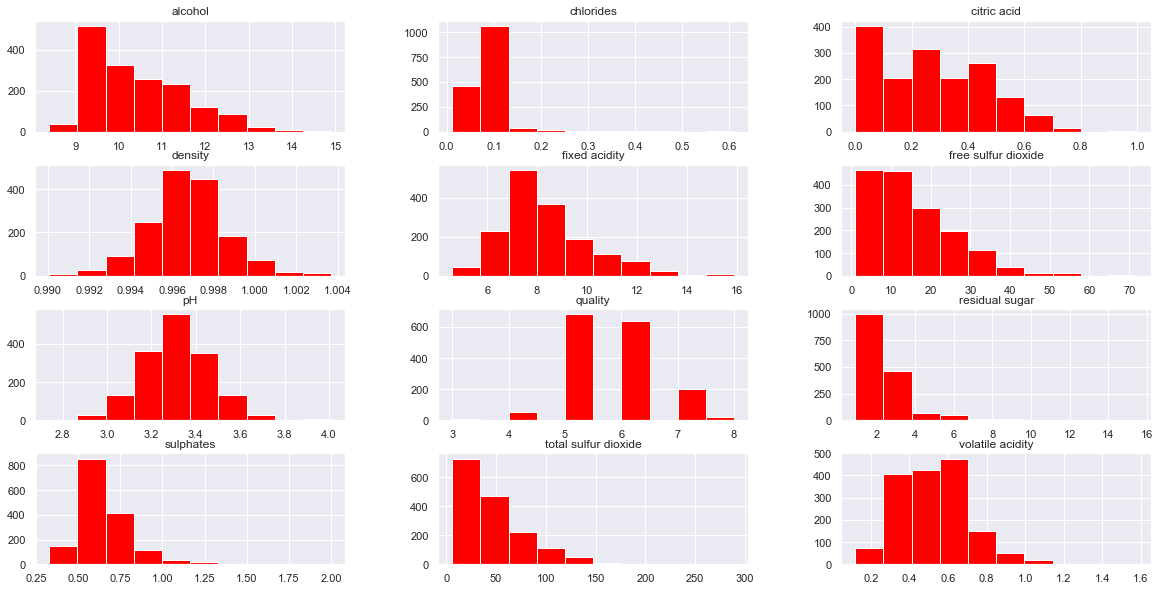

In [6]:
# Red wine histograms
sns.set()
df_red.hist(figsize=(20,10), color='red')
plt.show()

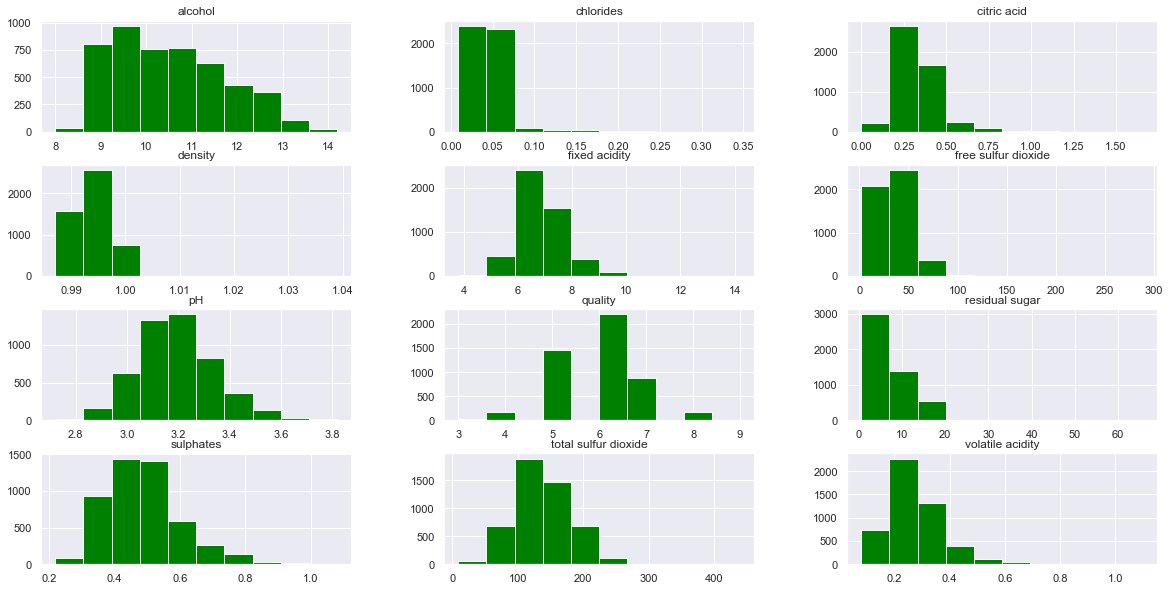

In [7]:
# White wine histograms
sns.set()
df_white.hist(figsize=(20,10), color='green')
plt.show()

Let's look at quality a little more closely.

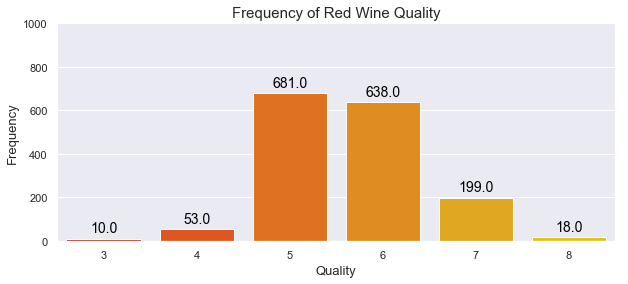

In [8]:
# Red wine quality frequency
value_counts = df_red.quality.value_counts()
target_counts = pd.DataFrame({'quality': list(value_counts.index), 'value_count': value_counts})

plt.figure(figsize=(10,4))
g = sns.barplot(x='quality', y='value_count', data=target_counts, capsize=0.3, palette='autumn')
g.set_title("Frequency of Red Wine Quality", fontsize=15)
g.set_xlabel("Quality", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 200, 400, 600, 800, 1000])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

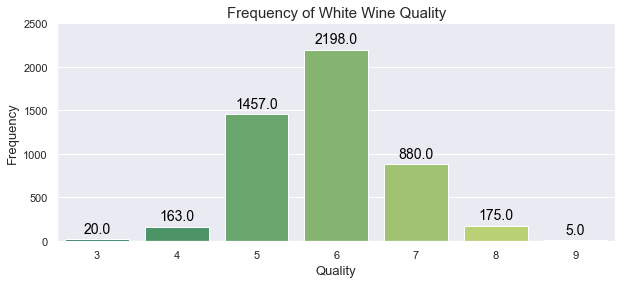

In [9]:
# White wine quality frequency
value_counts = df_white.quality.value_counts()
target_counts = pd.DataFrame({'quality': list(value_counts.index), 'value_count': value_counts})

plt.figure(figsize=(10,4))
g = sns.barplot(x='quality', y='value_count', data=target_counts, capsize=0.3, palette='summer')
g.set_title("Frequency of White Wine Quality", fontsize=15)
g.set_xlabel("Quality", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 500, 1000, 1500, 2000, 2500])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [10]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [11]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


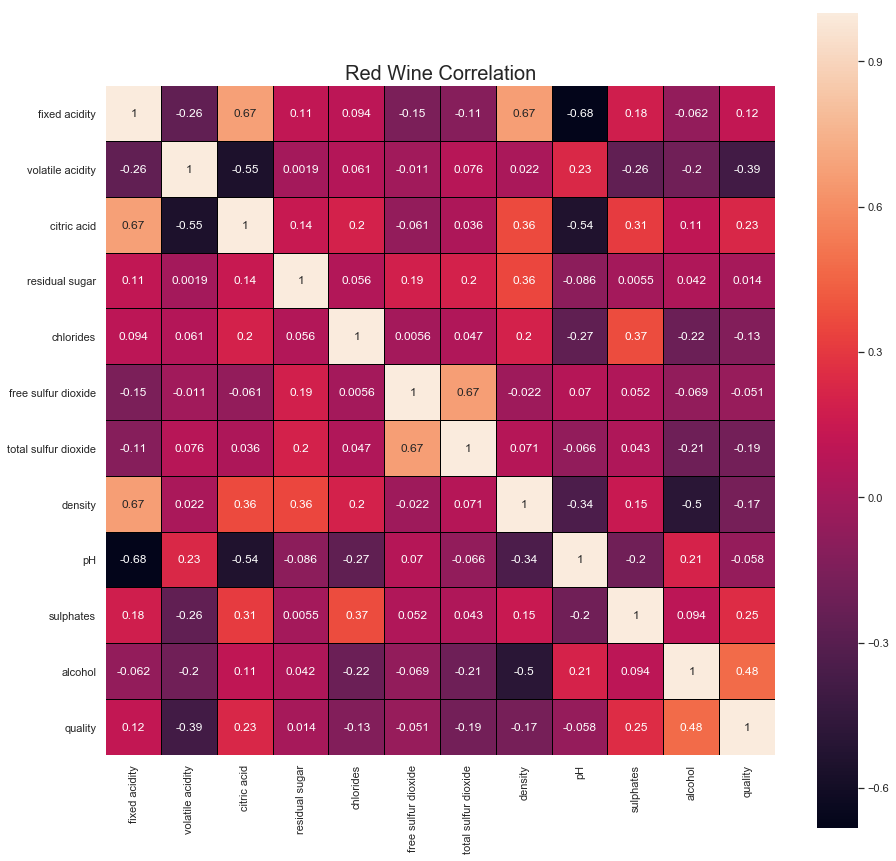

In [12]:
# Red wine correlation
colormap = plt.cm.viridis
corr_red = df_red.corr()

plt.figure(figsize=(15,15))
plt.title('Red Wine Correlation',size='20')
sns.heatmap(corr_red,vmax=1.0,linewidths=0.2,linecolor='black',square=True,
            annot=True)

Alcohol content and volatile acidity correlate with red wine quality.

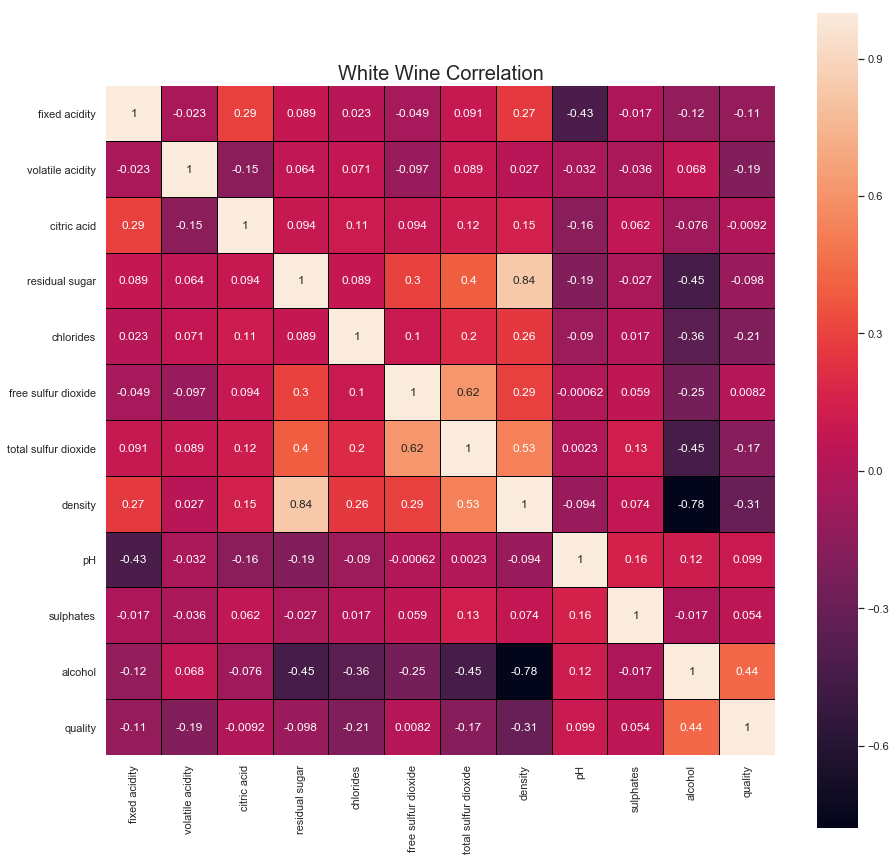

In [13]:
# White wine correlation
colormap = plt.cm.viridis
corr_white = df_white.corr()

plt.figure(figsize=(15,15))
plt.title('White Wine Correlation',size='20')
sns.heatmap(corr_white,vmax=1.0,linewidths=0.2,linecolor='black',square=True,
            annot=True)

Alcohol content and density correlate with white wine quality. Now, we scale the features.

In [14]:
cols = df_red.columns.tolist()
cols.remove('quality')

X_red = df_red.drop(columns = 'quality', axis=1)
scaler = StandardScaler()
X_red_std = scaler.fit_transform(X_red)
red_std = pd.DataFrame(X_red_std,columns=cols)
red_std['quality'] = df_red['quality']

X_white = df_white.drop(columns = 'quality', axis=1)
scaler = StandardScaler()
X_white_std = scaler.fit_transform(X_white)
white_std = pd.DataFrame(X_white_std,columns=cols)
white_std['quality'] = df_white['quality']

To get a good visual on how features compare to each distinct quality we group the mean of each feature by quality.

(-1, 9)

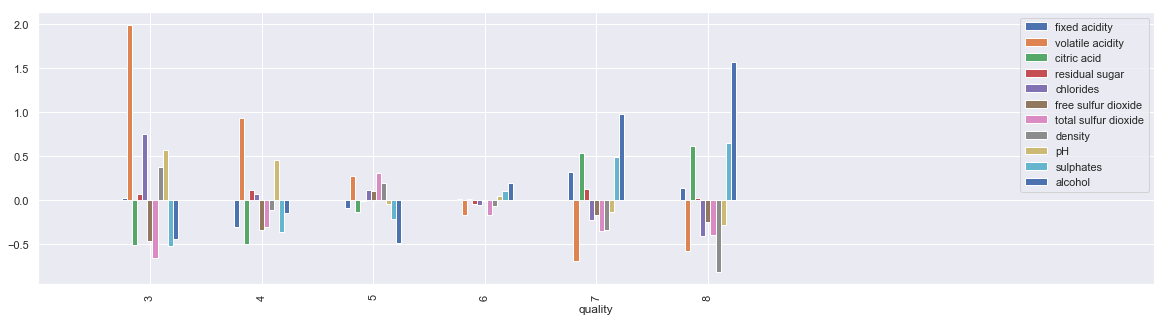

In [15]:
# red wine
red_std.groupby('quality').mean().plot(kind='bar', figsize=(20,5))
plt.xlim(-1,9)

(-1, 9)

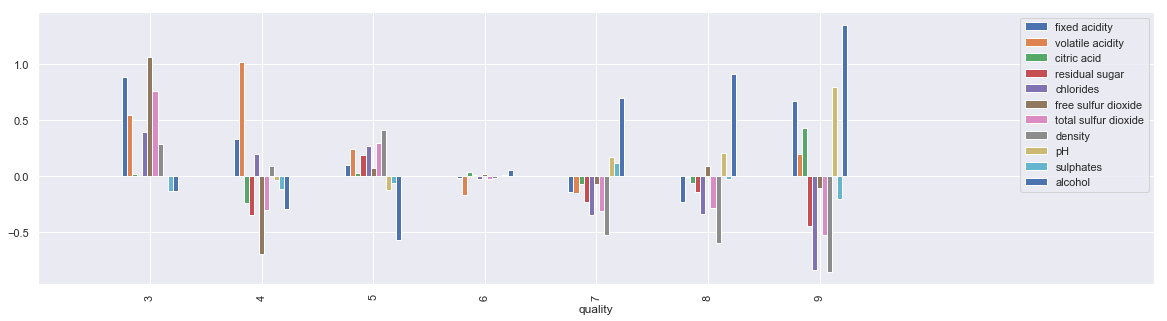

In [16]:
# white wine
white_std.groupby('quality').mean().plot(kind='bar', figsize=(20,5))
plt.xlim(-1,9)

Again we see high alcohol content for high quality wine.
For both wine types, qualities 7 and higher ("good" wines) are similar in terms of mean of each respecitive feature.
Wines that have a quality of 3 or 4 ("bad" wines) also have similar mean features.

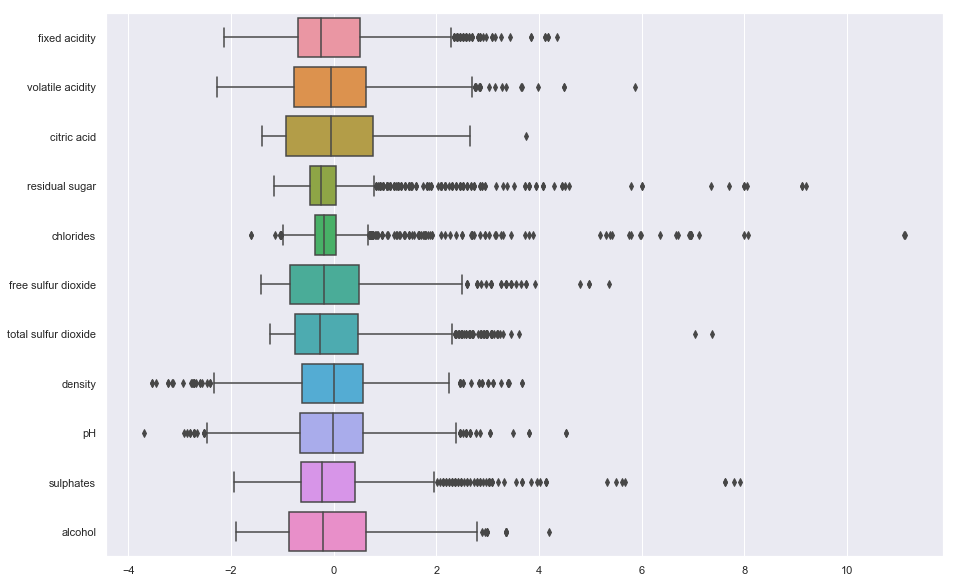

In [17]:
# Red wine box plots with scaled features
plt.figure(figsize=(15,10))
sns.boxplot(data=red_std.drop(columns=['quality']), orient='horizontal')

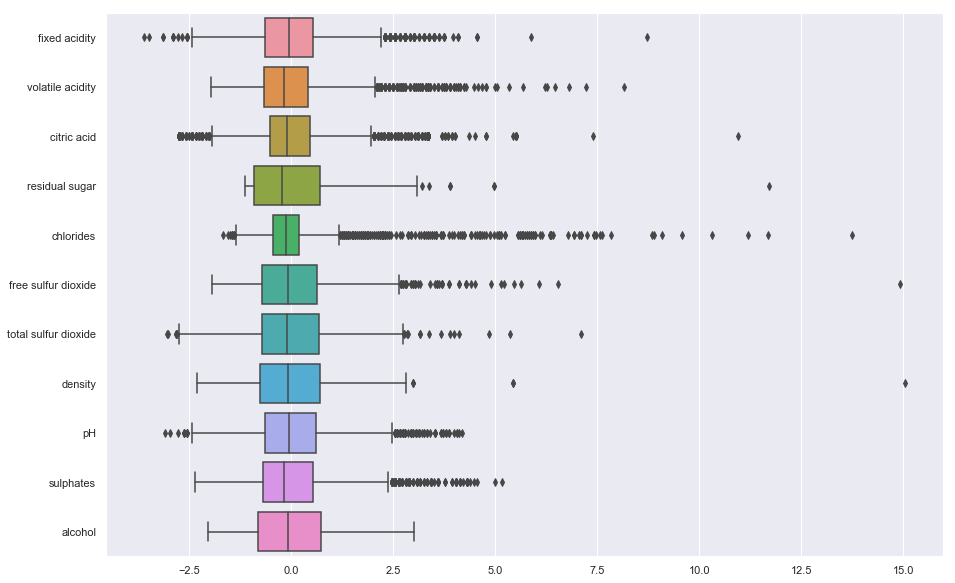

In [18]:
# White wine box plots with scaled features
plt.figure(figsize=(15,10))
sns.boxplot(data=white_std.drop(columns=['quality']), orient='horizontal')

We lightly winzorize the data to rid the very far extremes.

In [21]:
#winzorize outliers for both wine types

columns = df_red.columns
columns1 = columns.drop('quality')

red_std_winz = pd.DataFrame()
red_std_winz['quality'] = red_std['quality']

for column in columns1:
    red_std_winz[column] = winsorize(red_std[column], (0.03,0.03))
    
white_std_winz = pd.DataFrame()
white_std_winz['quality'] = white_std['quality']

for column in columns1:
    white_std_winz[column] = winsorize(white_std[column], (0.03,0.03))

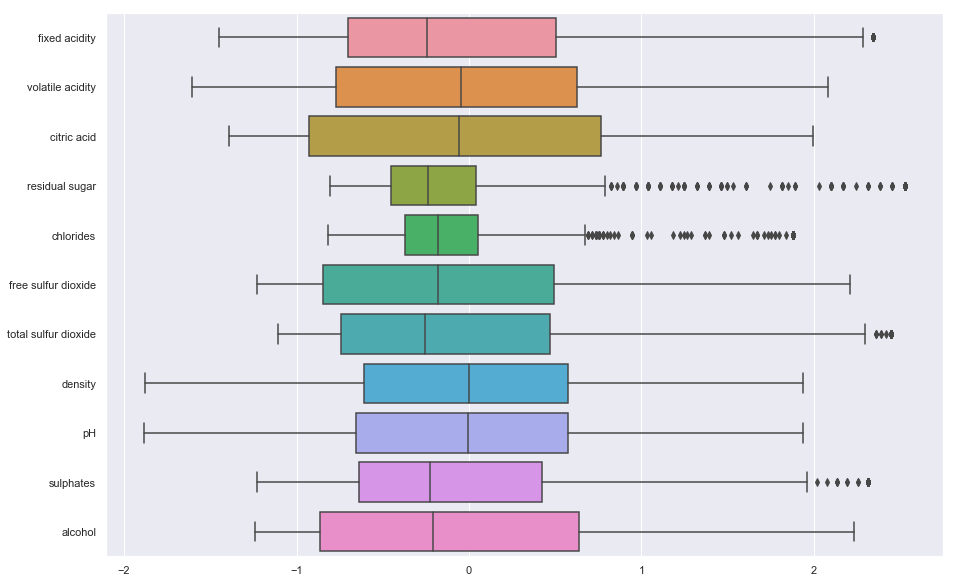

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=red_std_winz.drop(columns=['quality']), orient='horizontal')

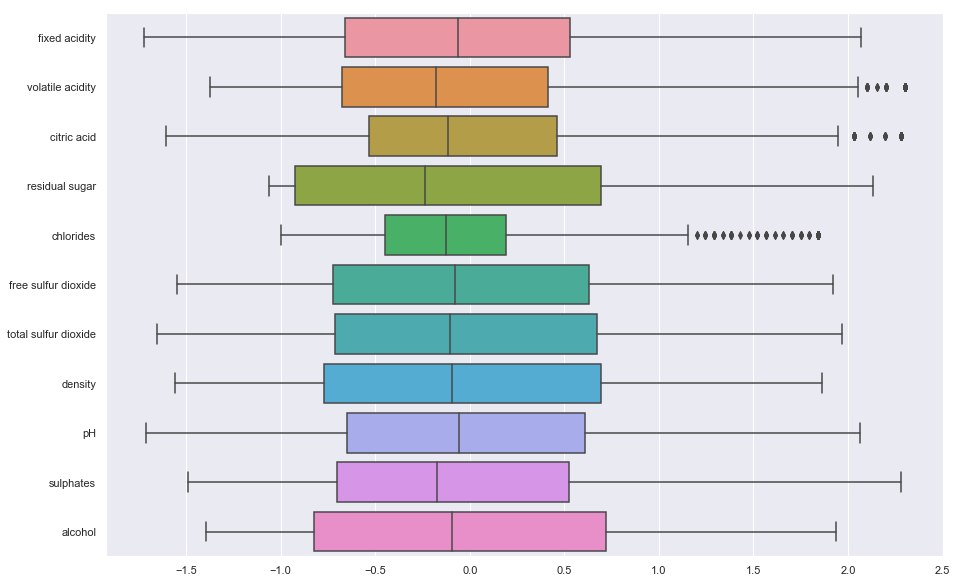

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=white_std_winz.drop(columns=['quality']), orient='horizontal')

In [24]:
# First two components of PCA for visualization purposes
X_red_pca = PCA(n_components=2).fit_transform(red_std_winz.drop(columns = 'quality', axis=1))
X_white_pca = PCA(n_components=2).fit_transform(white_std_winz.drop(columns = 'quality', axis=1))

X_red_pca = pd.DataFrame(X_red_pca)
X_white_pca = pd.DataFrame(X_white_pca)

In [25]:
# Here is a new categorical variable that splits the wine qualities into three groups (bad, average, good).
red_std_winz['quality_category'] = 0
red_std_winz.loc[(red_std_winz['quality'] >= 5) & (red_std_winz['quality'] <= 6), 'quality_category'] = 1
red_std_winz.loc[red_std_winz['quality'] >= 7, 'quality_category'] = 2

white_std_winz['quality_category'] = 0
white_std_winz.loc[(white_std_winz['quality'] >= 5) & (white_std_winz['quality'] <= 6), 'quality_category'] = 1
white_std_winz.loc[white_std_winz['quality'] >= 7, 'quality_category'] = 2

In [26]:
white_std_winz['quality_category'].value_counts()

1    3655
2    1060
0     183
Name: quality_category, dtype: int64

In [27]:
red_std_winz['quality_category'].value_counts()

1    1319
2     217
0      63
Name: quality_category, dtype: int64

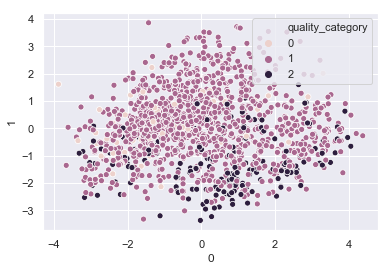

In [28]:
# Good, average, and bad red wine with first two principle components
sns.scatterplot(x=X_red_pca[0], y=X_red_pca[1],hue=red_std_winz['quality_category'])
plt.show()

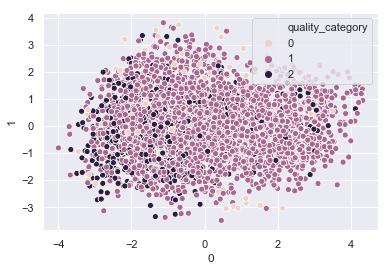

In [29]:
# Good, average, and bad white wine with first two principle components
sns.scatterplot(x=X_white_pca[0], y=X_white_pca[1],hue=white_std_winz['quality_category'])
plt.show()

The PCA visualization is noisy and does not give much insight to obvious, natural clusters. Let's also apply t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.000s...
[t-SNE] Computed neighbors for 1599 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 0.227867
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 69.5682449, gradient norm = 0.1292362 (50 iterations in 0.780s)
[t-SNE] Iteration 100: error = 60.2038612, gradient norm = 0.0313379 (50 iterations in 0.536s)
[t-SNE] Iteration 150: error = 59.3713264, gradient norm = 0.0081032 (50 iterations in 0.495s)
[t-SNE] Iteration 200: error = 59.2371750, gradient norm = 0.0018025 (50 iterations in 0.502s)
[t-SNE] Iteration 250: error = 59.2122803, gradient norm = 0.0008959 (50 iterations in 0.534s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.212280
[t-SNE] Iteration 300: error = 0.6508166, gradient norm = 0.0006657 (50 iterations in 0.509s)

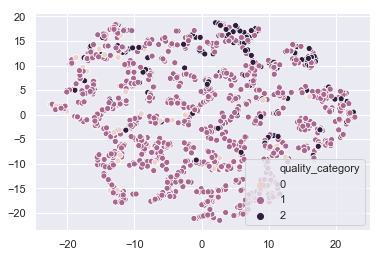

In [30]:
# t-SNE for visualization (red wine)
tsne = TSNE(n_components=2, verbose=10, perplexity=30, n_iter=300)
tsne_red = tsne.fit_transform(X_red_pca)

sns.scatterplot(x=tsne_red[:,0], y=tsne_red[:,1],hue=red_std_winz['quality_category'])
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4898 samples in 0.002s...
[t-SNE] Computed neighbors for 4898 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4898
[t-SNE] Computed conditional probabilities for sample 2000 / 4898
[t-SNE] Computed conditional probabilities for sample 3000 / 4898
[t-SNE] Computed conditional probabilities for sample 4000 / 4898
[t-SNE] Computed conditional probabilities for sample 4898 / 4898
[t-SNE] Mean sigma: 0.132613
[t-SNE] Computed conditional probabilities in 0.226s
[t-SNE] Iteration 50: error = 81.1798172, gradient norm = 0.0353089 (50 iterations in 2.762s)
[t-SNE] Iteration 100: error = 69.7649307, gradient norm = 0.0096232 (50 iterations in 1.839s)
[t-SNE] Iteration 150: error = 66.7867279, gradient norm = 0.0048211 (50 iterations in 1.847s)
[t-SNE] Iteration 200: error = 65.3063354, gradient norm = 0.0033601 (50 iterations in 1.981s)
[t-SNE] Iteration 250: error = 64.5706100, gradient norm = 0.0031343

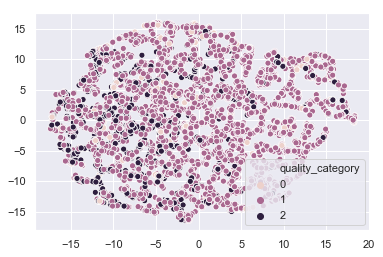

In [31]:
# t-SNE for visualization (white wine)

tsne = TSNE(n_components=2, verbose=10, perplexity=30, n_iter=300)
tsne_white = tsne.fit_transform(X_white_pca)

sns.scatterplot(x=tsne_white[:,0], y=tsne_white[:,1],hue=white_std_winz['quality_category'])
plt.show()

These feature reduction techniques do not offer much visual insight for either wine type. Since the dataset is small, we work with all of the data and its features when applying clustering algorithms. First we apply KMeans with both the three quality categories approach and also full qualities.

In [32]:
# KMeans with three clusters
y_red_pred = KMeans(n_clusters=3).fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
y_white_pred = KMeans(n_clusters=3).fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

# ARI of KMeans with three clusters (comparing to the three quality categories) and silhouette scores
print("ARI score of KMeans with three clusters on red wine: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality_category'], y_red_pred)))
print("ARI score of KMeans with three clusters on white wine: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality_category'], y_white_pred)))
print("------------------------------------------------")
print("Silhouette score of KMeans with three clusters on red wine: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category']), y_red_pred, metric='euclidean')))
print("Silhouette score of KMeans with three clusters on white wine: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category']), y_white_pred, metric='euclidean')))

ARI score of KMeans with three clusters on red wine: 0.017036848742546434
ARI score of KMeans with three clusters on white wine: 0.03622238450137583
------------------------------------------------
Silhouette score of KMeans with three clusters on red wine: 0.20160659298958186
Silhouette score of KMeans with three clusters on white wine: 0.1617059735882232


In [33]:
# KMeans with number of clusters respecting the distinct number of qualities
y_red_pred = KMeans(n_clusters=6).fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
y_white_pred = KMeans(n_clusters=7).fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

# ARI of KMeans with number of clusters respecting number of qualities and silhouette scores
print("ARI score of KMeans with six clusters on red wine: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))
print("ARI score of KMeans with seven clusters on white wine: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))
print("------------------------------------------------")
print("Silhouette score of KMeans with six clusters on red wine: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category']), y_red_pred, metric='euclidean')))
print("Silhouette score of KMeans with seven clusters on white wine: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category']), y_white_pred, metric='euclidean')))

ARI score of KMeans with six clusters on red wine: 0.0708901218329464
ARI score of KMeans with seven clusters on white wine: 0.03406792616493875
------------------------------------------------
Silhouette score of KMeans with six clusters on red wine: 0.18986588740454205
Silhouette score of KMeans with seven clusters on white wine: 0.1241689273715166


The silhouette score was slightly better with the three quality categories. The ARI was better with using all distinct qualities. For the remainder of this notebook, only the full qualities will be used as a benchmark for ARI.

Next, let's run through KMeans with 2-10 clusters for both types of wine.

In [34]:
# KMeans with 2-15 clusters. We store ARI and Silhouette scores in arrays for both wine types

red_sil_array = []
red_ari_array = []
white_sil_array = []
white_ari_array = []

for n in range(2,16):
    y_red_pred = KMeans(n_clusters=n).fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
    y_white_pred = KMeans(n_clusters=n).fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))
    red_ari_array.append(metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred))
    white_ari_array.append(metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred))
    red_sil_array.append(metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category']),
                            y_red_pred, metric='euclidean'))
    white_sil_array.append(metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category']),
                            y_white_pred, metric='euclidean'))

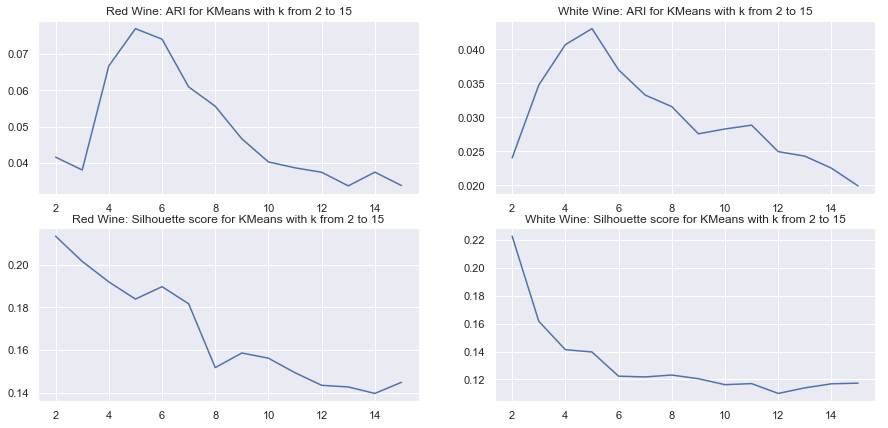

In [35]:
r = list(range(2,16))

plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
sns.lineplot(x=r, y=red_ari_array)
plt.title("Red Wine: ARI for KMeans with k from 2 to 15")

plt.subplot(2,2,2)
sns.lineplot(x=r, y=white_ari_array)
plt.title("White Wine: ARI for KMeans with k from 2 to 15")

plt.subplot(2,2,3)
sns.lineplot(x=r, y=red_sil_array)
plt.title("Red Wine: Silhouette score for KMeans with k from 2 to 15")

plt.subplot(2,2,4)
sns.lineplot(x=r, y=white_sil_array)
plt.title("White Wine: Silhouette score for KMeans with k from 2 to 15")

plt.show()

Silhouette scores are best with only 2 or 3 clusters; however, the ARI is best for both wine types with 5 clusters.

Below are some dendrograms for both wine types.

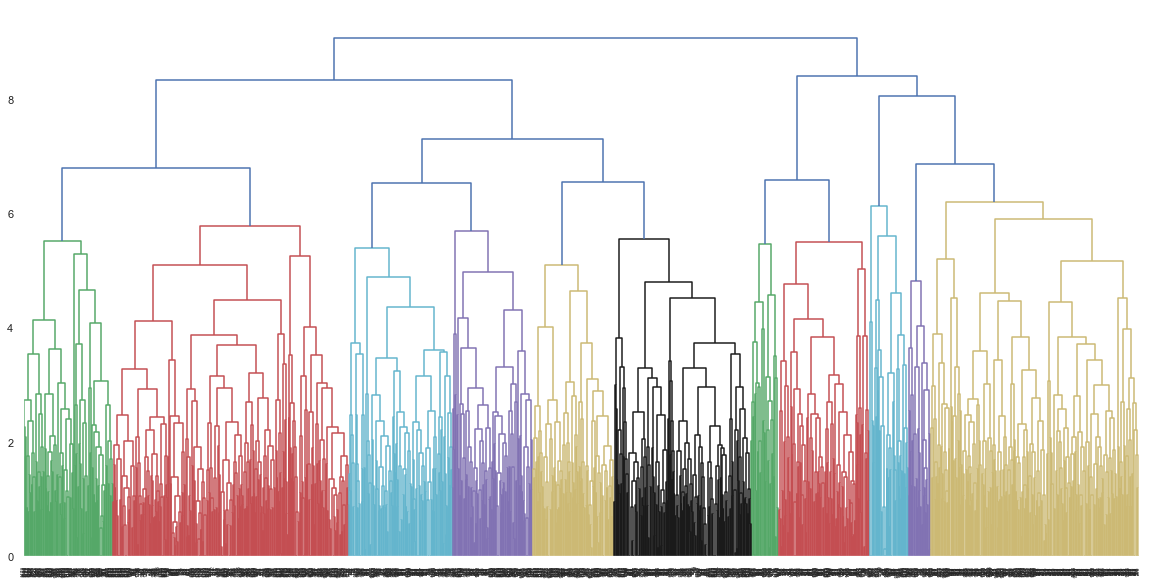

In [36]:
# Red wine dendrogram with complete linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(red_std_winz.drop(columns=['quality','quality_category'], axis=1), method='complete'))
plt.show()

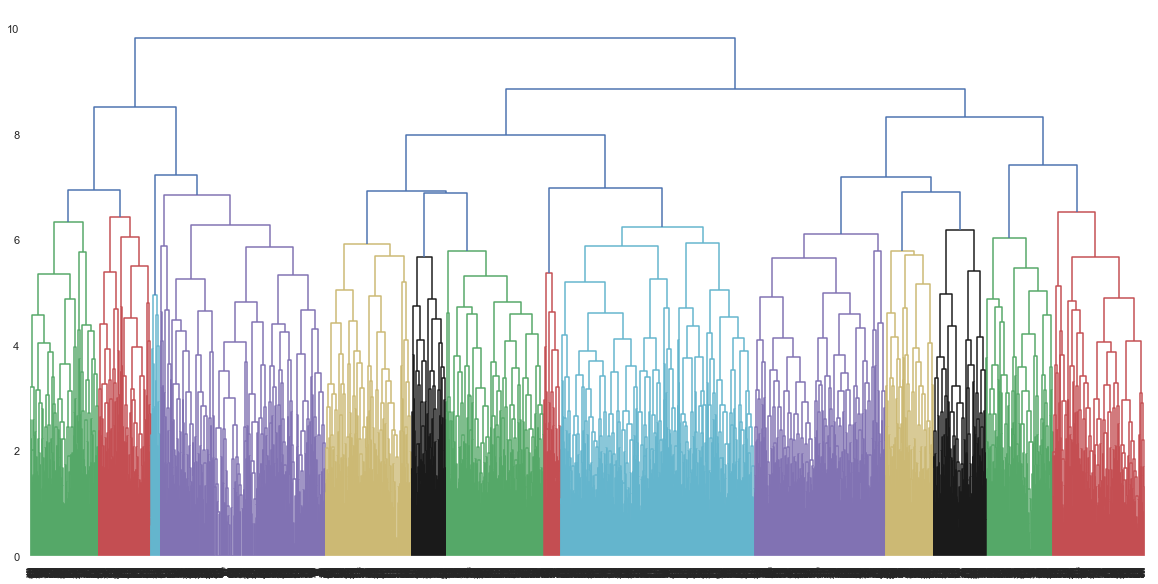

In [37]:
# White wine dendrogram with complete linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(white_std_winz.drop(columns=['quality','quality_category'], axis=1), method='complete'))
plt.show()

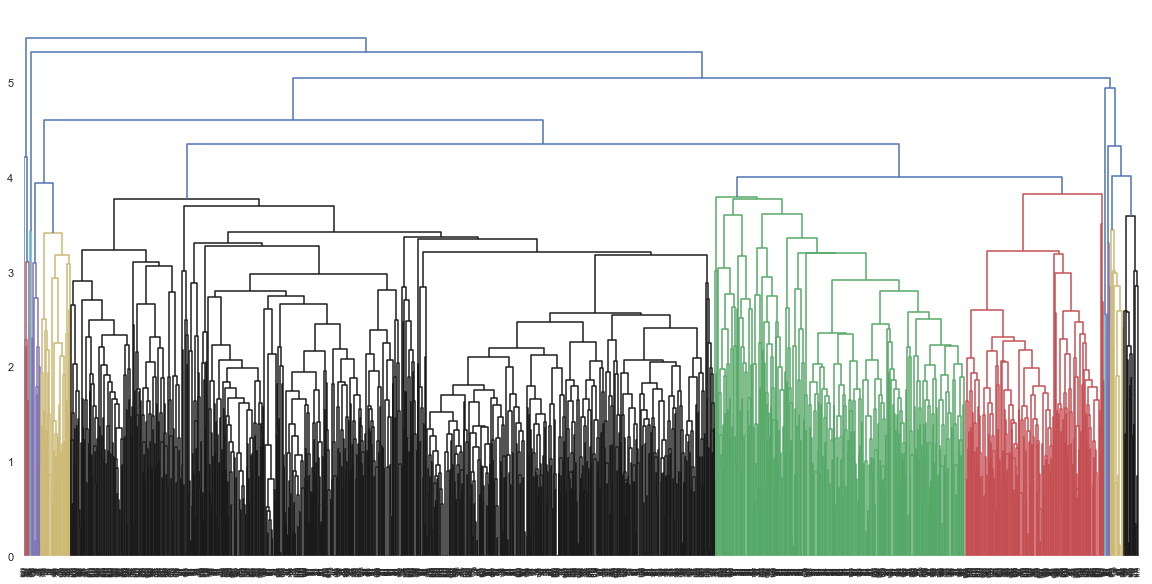

In [38]:
# Red wine dendrogram with average linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(red_std_winz.drop(columns=['quality','quality_category'], axis=1), method='average'))
plt.show()

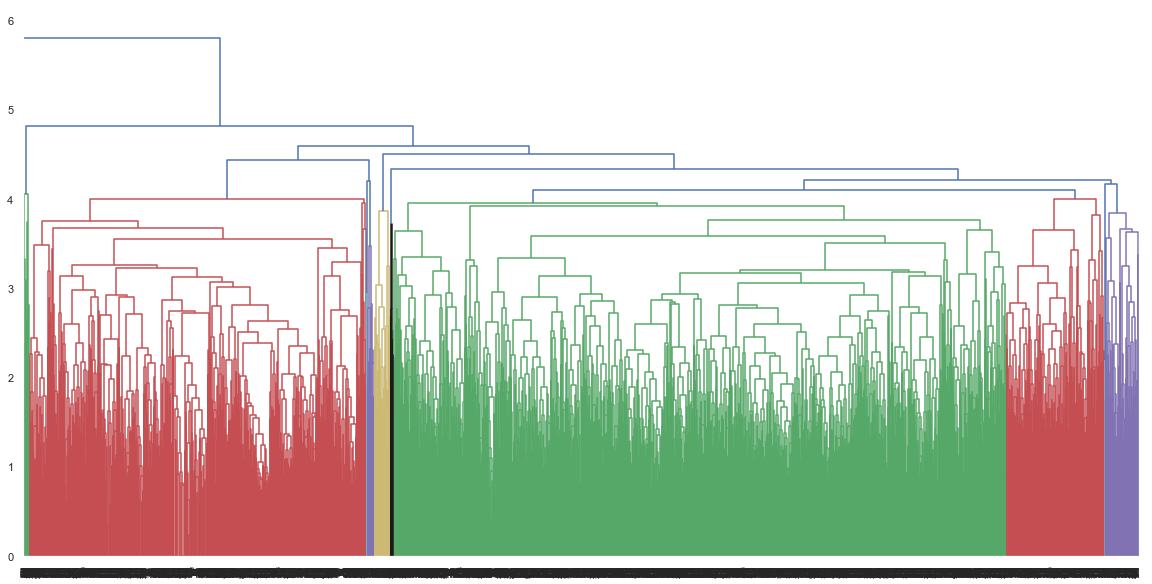

In [39]:
# White wine dendrogram with average linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(white_std_winz.drop(columns=['quality','quality_category'], axis=1), method='average'))
plt.show()

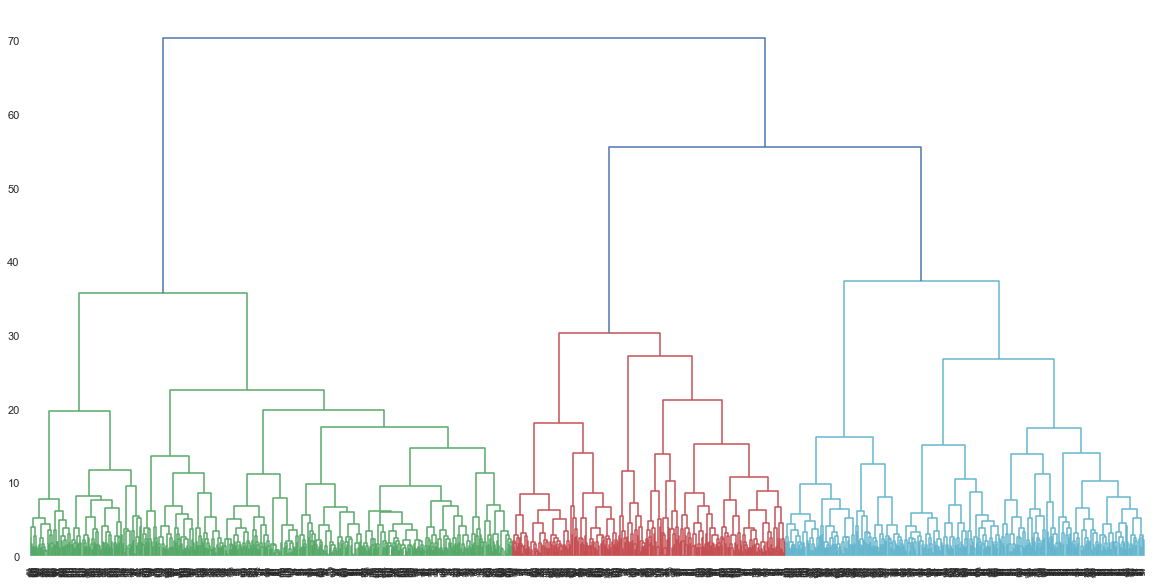

In [40]:
# Red wine dendrogram with ward linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(red_std_winz.drop(columns=['quality','quality_category'], axis=1), method='ward'))
plt.show()

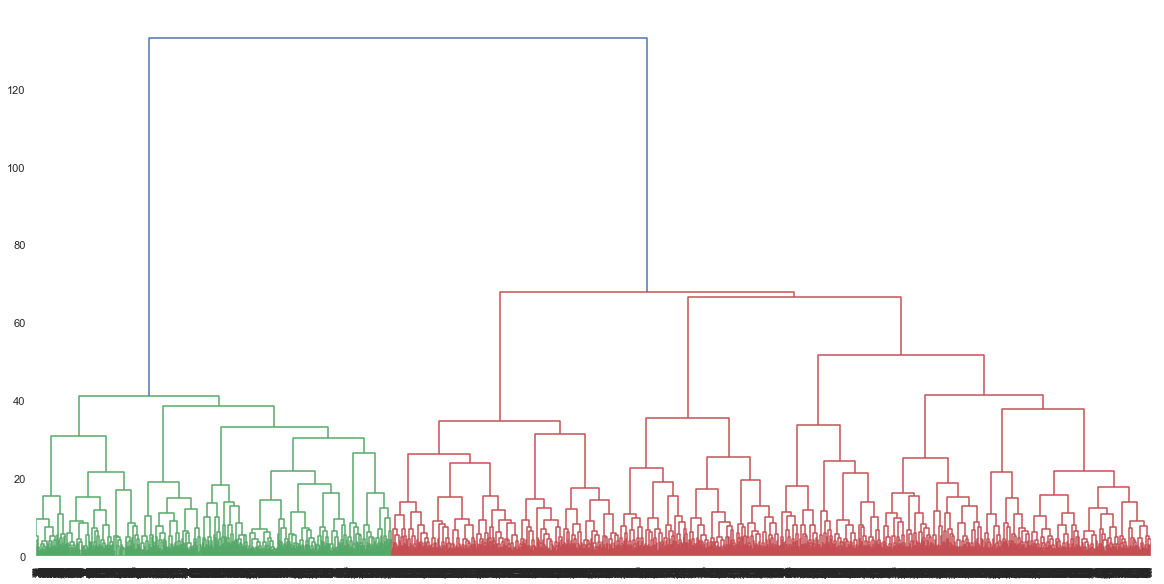

In [41]:
# White wine dendrogram with ward linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(white_std_winz.drop(columns=['quality','quality_category'], axis=1), method='ward'))
plt.show()

In [42]:
# With the various linkage methods, here are ARI and silhouette scores with agglomerative clustering with two clusters for red wine
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.0799269362756714
Silhouette score of linkage method average: 0.20244796429049458
------------------------------------------------
ARI score of linkage method complete: -0.004228938147904019
Silhouette score of linkage method complete: 0.07161682638971106
------------------------------------------------
ARI score of linkage method ward: 0.0024994666030068603
Silhouette score of linkage method ward: 0.16287989463716293
------------------------------------------------


In [43]:
# With the various linkage methods, here are ARI and silhouette scores with agglomerative clustering with three clusters for red wine
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.03430898691335004
Silhouette score of linkage method average: 0.16380140440001398
------------------------------------------------
ARI score of linkage method complete: -0.0035729801581951028
Silhouette score of linkage method complete: 0.0816083374589107
------------------------------------------------
ARI score of linkage method ward: 0.0316657365659816
Silhouette score of linkage method ward: 0.18007375794979347
------------------------------------------------


In [44]:
# With the various linkage methods, here are ARI and silhouette scores with agglomerative clustering with four clusters for red wine
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=4)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=4)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.03532679793009332
Silhouette score of linkage method average: 0.1015027495630734
------------------------------------------------
ARI score of linkage method complete: 0.053359541857217675
Silhouette score of linkage method complete: 0.11125871977974373
------------------------------------------------
ARI score of linkage method ward: 0.046897228842240894
Silhouette score of linkage method ward: 0.15320070202507052
------------------------------------------------


In [45]:
# With the various linkage methods, here are ARI and silhouette scores with agglomerative clustering with two clusters for white wine
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.01967214038020632
Silhouette score of linkage method average: 0.1898976337503384
------------------------------------------------
ARI score of linkage method complete: 0.003208794524889735
Silhouette score of linkage method complete: 0.14660457137767036
------------------------------------------------
ARI score of linkage method ward: 0.008735893331189449
Silhouette score of linkage method ward: 0.19265922631787832
------------------------------------------------


In [46]:
# With the various linkage methods, here are ARI and silhouette scores with agglomerative clustering with three clusters for white wine
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.023818927781343528
Silhouette score of linkage method average: 0.11374246214979722
------------------------------------------------
ARI score of linkage method complete: 0.01785073109106643
Silhouette score of linkage method complete: 0.09581184447999583
------------------------------------------------
ARI score of linkage method ward: 0.04165841111614065
Silhouette score of linkage method ward: 0.10429613689676427
------------------------------------------------


In [47]:
# With the various linkage methods, here are ARI and silhouette scores with agglomerative clustering with four clusters for white wine
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=4)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=4)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.048818646664990445
Silhouette score of linkage method average: 0.09183640841655964
------------------------------------------------
ARI score of linkage method complete: 0.003824278743596129
Silhouette score of linkage method complete: 0.08133846276250252
------------------------------------------------
ARI score of linkage method ward: 0.039841656656059134
Silhouette score of linkage method ward: 0.10818317271782733
------------------------------------------------


Ward appears to perform best. Now only working with ward linkage method, let's look at ARI and silhouette scores varying from 2 to 15 clusters

In [49]:
# Agglomerative clustering with ward linkage method with 2-16 clusters.
# We store ARI and Silhouette scores in arrays for both wine types

red_sil_array = []
red_ari_array = []
white_sil_array = []
white_ari_array = []

for n in range(2,16):
    agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=n)
    y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
    y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))
    red_ari_array.append(metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred))
    white_ari_array.append(metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred))
    red_sil_array.append(metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                            y_red_pred, metric='euclidean'))
    white_sil_array.append(metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                            y_white_pred, metric='euclidean'))

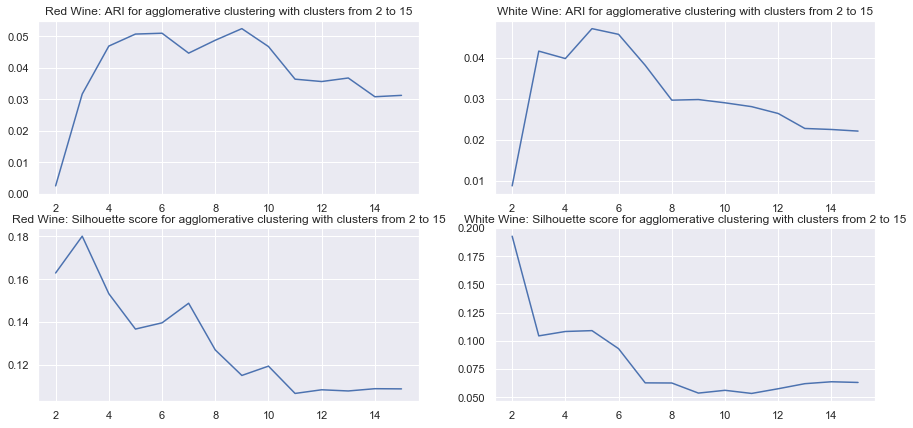

In [50]:
r = list(range(2,16))

plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
sns.lineplot(x=r, y=red_ari_array)
plt.title("Red Wine: ARI for agglomerative clustering with clusters from 2 to 15")

plt.subplot(2,2,2)
sns.lineplot(x=r, y=white_ari_array)
plt.title("White Wine: ARI for agglomerative clustering with clusters from 2 to 15")

plt.subplot(2,2,3)
sns.lineplot(x=r, y=red_sil_array)
plt.title("Red Wine: Silhouette score for agglomerative clustering with clusters from 2 to 15")

plt.subplot(2,2,4)
sns.lineplot(x=r, y=white_sil_array)
plt.title("White Wine: Silhouette score for agglomerative clustering with clusters from 2 to 15")

plt.show()

Like with KMeans, silhoutte scores are best with 2 or 3 clusters, and ARI is highest around 5 to 6 clusters. Note that with red wine ARI is consistently high until 10 clusters.

Let's look at clustering with DBSCAN

In [51]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
y_red_pred = dbscan_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
y_white_pred = dbscan_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

print("ARI score of DBSCAN with distance 1 and 5 mininum samples for red: {}".format(
    metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

print("Silhouette score of DBSCAN with distance 1 and 5 minimum samples for red: {}".format(
    metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
print("------------------------------------------------")

print("ARI score of DBSCAN with distance 1 and 5 mininum samples for white: {}".format(
    metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

print("Silhouette score of DBSCAN with distance 1 and 5 minimum samples for white: {}".format(
    metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
print("------------------------------------------------")

ARI score of DBSCAN with distance 1 and 5 mininum samples for red: -0.01206663920681862
Silhouette score of DBSCAN with distance 1 and 5 minimum samples for red: -0.30236451681417537
------------------------------------------------
ARI score of DBSCAN with distance 1 and 5 mininum samples for white: 0.0019048186638376265
Silhouette score of DBSCAN with distance 1 and 5 minimum samples for white: -0.30590051077877695
------------------------------------------------


In [52]:
# number of clusters
print(len(np.unique(y_red_pred)))
print(len(np.unique(y_white_pred)))

26
93


The poorer ARI and silhouette scores might be reflected by having too many clusters.

In [53]:

for i in range(5,21):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i)

    # Fit model
    y_red_pred = dbscan_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
    y_white_pred = dbscan_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

    print("ARI score of DBSCAN with distance 1 and {} mininum samples for red: {}".format(i,
        metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred)))

    print("Silhouette score of DBSCAN with distance 1 and {} minimum samples for red: {}".format(i,
        metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_red_pred, metric='euclidean')))
    print("The number of clusters is {}".format(len(np.unique(y_red_pred))))
    print("------------------------------------------------")

    print("ARI score of DBSCAN with distance 1 and {} mininum samples for white: {}".format(i,
        metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred)))

    print("Silhouette score of DBSCAN with distance 1 and {} minimum samples for white: {}".format(i,
        metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                             y_white_pred, metric='euclidean')))
    print("The number of clusters is {}".format(len(np.unique(y_white_pred))))
    print("------------------------------------------------")

ARI score of DBSCAN with distance 1 and 5 mininum samples for red: -0.01206663920681862
Silhouette score of DBSCAN with distance 1 and 5 minimum samples for red: -0.30236451681417537
The number of clusters is 26
------------------------------------------------
ARI score of DBSCAN with distance 1 and 5 mininum samples for white: 0.0019048186638376265
Silhouette score of DBSCAN with distance 1 and 5 minimum samples for white: -0.30590051077877695
The number of clusters is 93
------------------------------------------------
ARI score of DBSCAN with distance 1 and 6 mininum samples for red: -0.018436294316246115
Silhouette score of DBSCAN with distance 1 and 6 minimum samples for red: -0.2959434811294196
The number of clusters is 17
------------------------------------------------
ARI score of DBSCAN with distance 1 and 6 mininum samples for white: 0.0035815579599456984
Silhouette score of DBSCAN with distance 1 and 6 minimum samples for white: -0.31673630046927315
The number of clusters i

Silhouette score of DBSCAN with distance 1 and 20 minimum samples for white: -0.1328562703961084
The number of clusters is 7
------------------------------------------------


DBSCAN appears to be less effective than the other clustering methods. Let's compare the KMeans and Agglomerative clustering.

In [54]:
red_sil_array_k = []
red_ari_array_k = []
white_sil_array_k = []
white_ari_array_k = []

for n in range(2,11):
    y_red_pred = KMeans(n_clusters=n).fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
    y_white_pred = KMeans(n_clusters=n).fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))
    red_ari_array_k.append(metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred))
    white_ari_array_k.append(metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred))
    red_sil_array_k.append(metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category']),
                            y_red_pred, metric='euclidean'))
    white_sil_array_k.append(metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category']),
                            y_white_pred, metric='euclidean'))
    
red_sil_array_agg = []
red_ari_array_agg = []
white_sil_array_agg = []
white_ari_array_agg = []

for n in range(2,11):
    agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=n)
    y_red_pred = agg_cluster.fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
    y_white_pred = agg_cluster.fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))
    red_ari_array_agg.append(metrics.adjusted_rand_score(red_std_winz['quality'], y_red_pred))
    white_ari_array_agg.append(metrics.adjusted_rand_score(white_std_winz['quality'], y_white_pred))
    red_sil_array_agg.append(metrics.silhouette_score(red_std_winz.drop(columns=['quality','quality_category'], axis=1),
                            y_red_pred, metric='euclidean'))
    white_sil_array_agg.append(metrics.silhouette_score(white_std_winz.drop(columns=['quality','quality_category'], axis=1),
                            y_white_pred, metric='euclidean'))

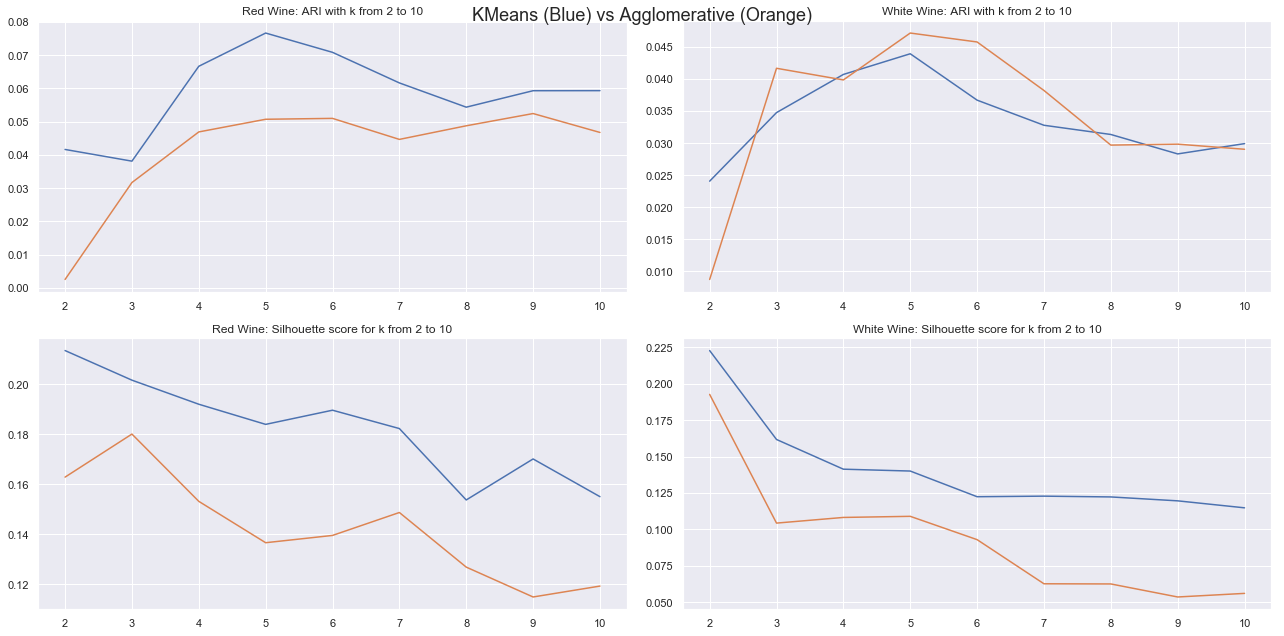

In [55]:
r = list(range(2,11))

plt.figure(figsize=(18,9))

plt.subplot(2,2,1)
sns.lineplot(x=r, y=red_ari_array_k)
plt.title("Red Wine: ARI with k from 2 to 10")
plt.subplot(2,2,1)
sns.lineplot(x=r, y=red_ari_array_agg)
plt.title("Red Wine: ARI with k from 2 to 10")

plt.subplot(2,2,2)
sns.lineplot(x=r, y=white_ari_array_k)
plt.title("White Wine: ARI with k from 2 to 10")
plt.subplot(2,2,2)
sns.lineplot(x=r, y=white_ari_array_agg)
plt.title("White Wine: ARI with k from 2 to 10")


plt.subplot(2,2,3)
sns.lineplot(x=r, y=red_sil_array_k)
plt.title("Red Wine: Silhouette score for k from 2 to 10")
plt.subplot(2,2,3)
sns.lineplot(x=r, y=red_sil_array_agg)
plt.title("Red Wine: Silhouette score for k from 2 to 10")

plt.subplot(2,2,4)
sns.lineplot(x=r, y=white_sil_array_k)
plt.title("White Wine: Silhouette score for k from 2 to 10")
plt.subplot(2,2,4)
sns.lineplot(x=r, y=white_sil_array_agg)
plt.title("White Wine: Silhouette score for k from 2 to 10")

plt.suptitle("KMeans (Blue) vs Agglomerative (Orange)", fontsize=18)
plt.tight_layout()
plt.show()

KMeans with 5 clusters is the best preformer for both wine types. Let's focus on it to see if this particular clustering gives any insight to wine quality.

In [57]:
# create columns for best clusterer for both wine types
red_std_winz['cluster'] = KMeans(n_clusters=5).fit_predict(red_std_winz.drop(columns=['quality','quality_category'], axis=1))
white_std_winz['cluster'] = KMeans(n_clusters=5).fit_predict(white_std_winz.drop(columns=['quality','quality_category'], axis=1))

Here are the means of each feature grouped by quality and then grouped by cluster for both wine types.

(-1, 9)

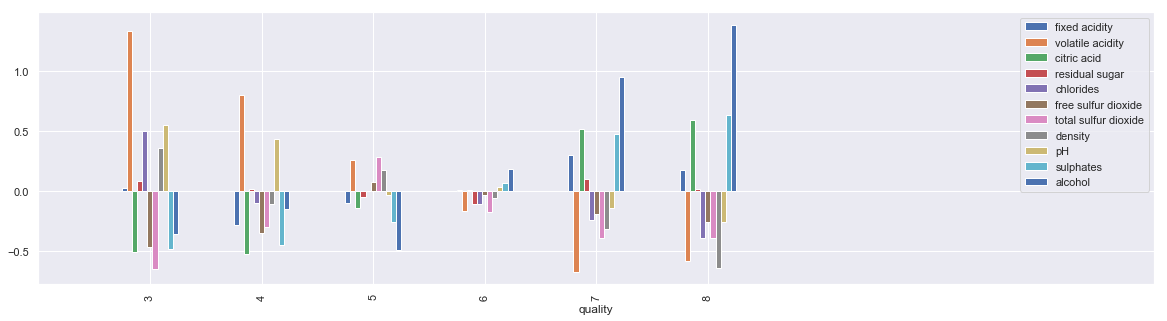

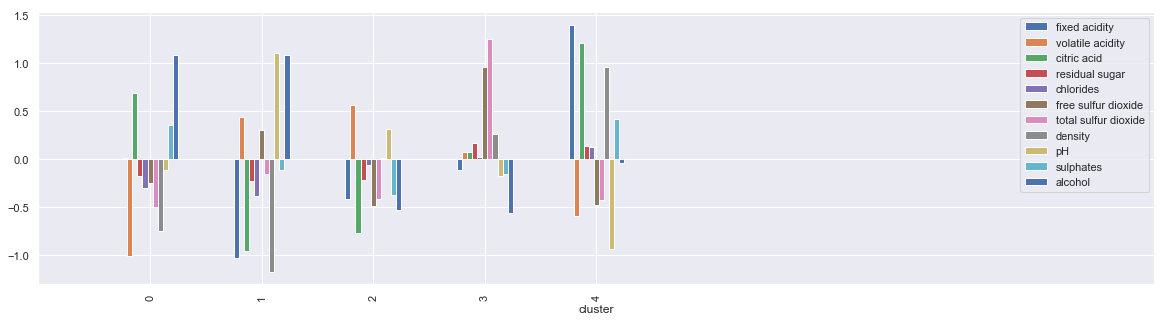

In [74]:
# red wine
red_std_winz.drop(columns=['cluster','quality_category'], axis=1).groupby('quality').mean().plot(kind='bar', figsize=(20,5))
plt.xlim(-1,9)

red_std_winz.drop(columns=['quality','quality_category'], axis=1).groupby('cluster').mean().plot(kind='bar', figsize=(20,5))
plt.xlim(-1,9)

(-1, 9)

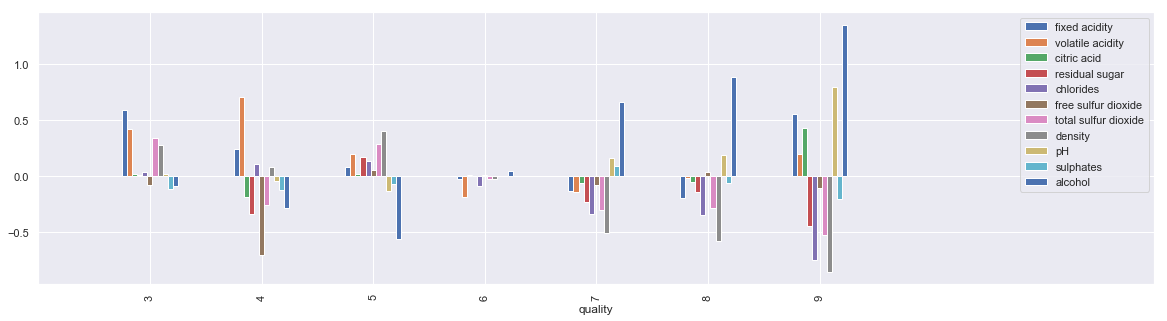

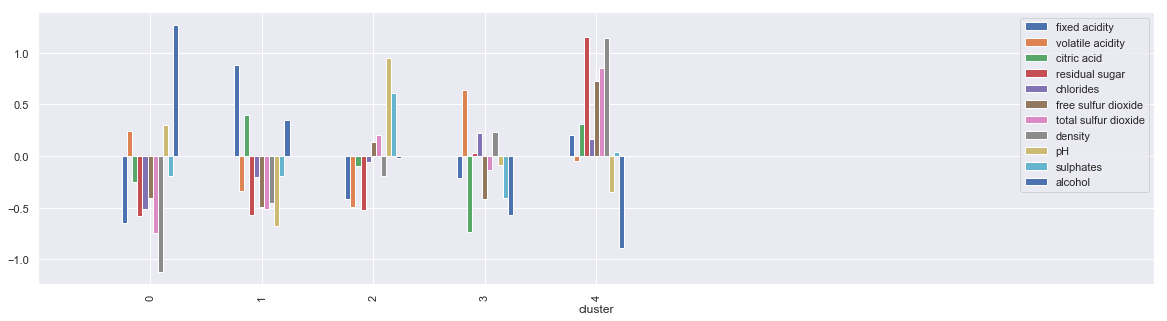

In [75]:
# white wine
white_std_winz.drop(columns=['cluster','quality_category'], axis=1).groupby('quality').mean().plot(kind='bar', figsize=(20,5))
plt.xlim(-1,9)

white_std_winz.drop(columns=['quality','quality_category'], axis=1).groupby('cluster').mean().plot(kind='bar', figsize=(20,5))
plt.xlim(-1,9)

# Conclusions and Remarks
1. For both wine types, the clustering did distinguish alcohol content relatively well. Two things that stand out with the cluster grouping is that the clustering separated the residual sugar and citric acid features more strongly.
2. With the residual sugar and citric acid features being more separated, the clustering may be distinguishing wine varieties instead of quality. This may explain the very low ARI scores in all of the clustering methods used above, where the ARI scores are comparing to quality.
3. Here are some shortcomings: (i) Wine variety is not listed, and looking at the data source there is not an obvious way to recover this. (ii) The ARI and Silhouette scores are relatively poor; again outside data would be useful here, since it is very likely the clustering is influenced by wine variety.
4. Where to take this further: To see if the clustering is influenced by variety, one could take several outside wines (with known varieties), place them in the nearest cluster, and measure trends.